In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
2
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

# Load and view data


In [3]:
df= pd.read_csv("insurance_claims.csv")
df1 = pd.read_csv("insurance_claims.csv")

In [4]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [5]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

# Data Preposessing/feaure engineering

In [7]:
#removing unrequired columns
df=df.drop(columns = [
    'policy_number', 
    'insured_zip', 
    'policy_bind_date', 
    'incident_date', 
    'incident_location',  
    'auto_year', 
    'incident_hour_of_the_day','umbrella_limit',])


In [8]:
df.replace("?", np.nan, inplace=True)

Data balancing

In [9]:

yes=df['fraud_reported'].value_counts()['Y']
no=df['fraud_reported'].value_counts()['N']
print(yes)
print(no)

247
753


In [42]:
# # # Separate majority and minority classes
df_majority = df[df['fraud_reported'] == 'Y']
df_minority = df[df['fraud_reported'] == 'N']

# Oversample minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

# Combine majority class with upsampled minority class
df= pd.concat([df_majority, df_minority_upsampled])

print(df_balanced['fraud_reported'].value_counts())

InvalidParameterError: The 'n_samples' parameter of resample must be an int in the range [1, inf) or None. Got 0 instead.

In [11]:
yes=df['fraud_reported'].value_counts()['Y']
no=df['fraud_reported'].value_counts()['N']
print(yes)
print(no)


247
247


In [12]:
df.isna().sum()

months_as_customer               0
age                              0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                  58
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
number_of_vehicles_involved      0
property_damage                189
bodily_injuries                  0
witnesses                        0
police_report_available        183
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
auto_make           

In [13]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [14]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

In [15]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [16]:
df.isna().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make                      0
auto_model                     0
fraud_repo

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Fit and transform the data
standardized_data = scaler.fit_transform(numeric_columns)


df[numeric_columns.columns] = standardized_data
# print(file)


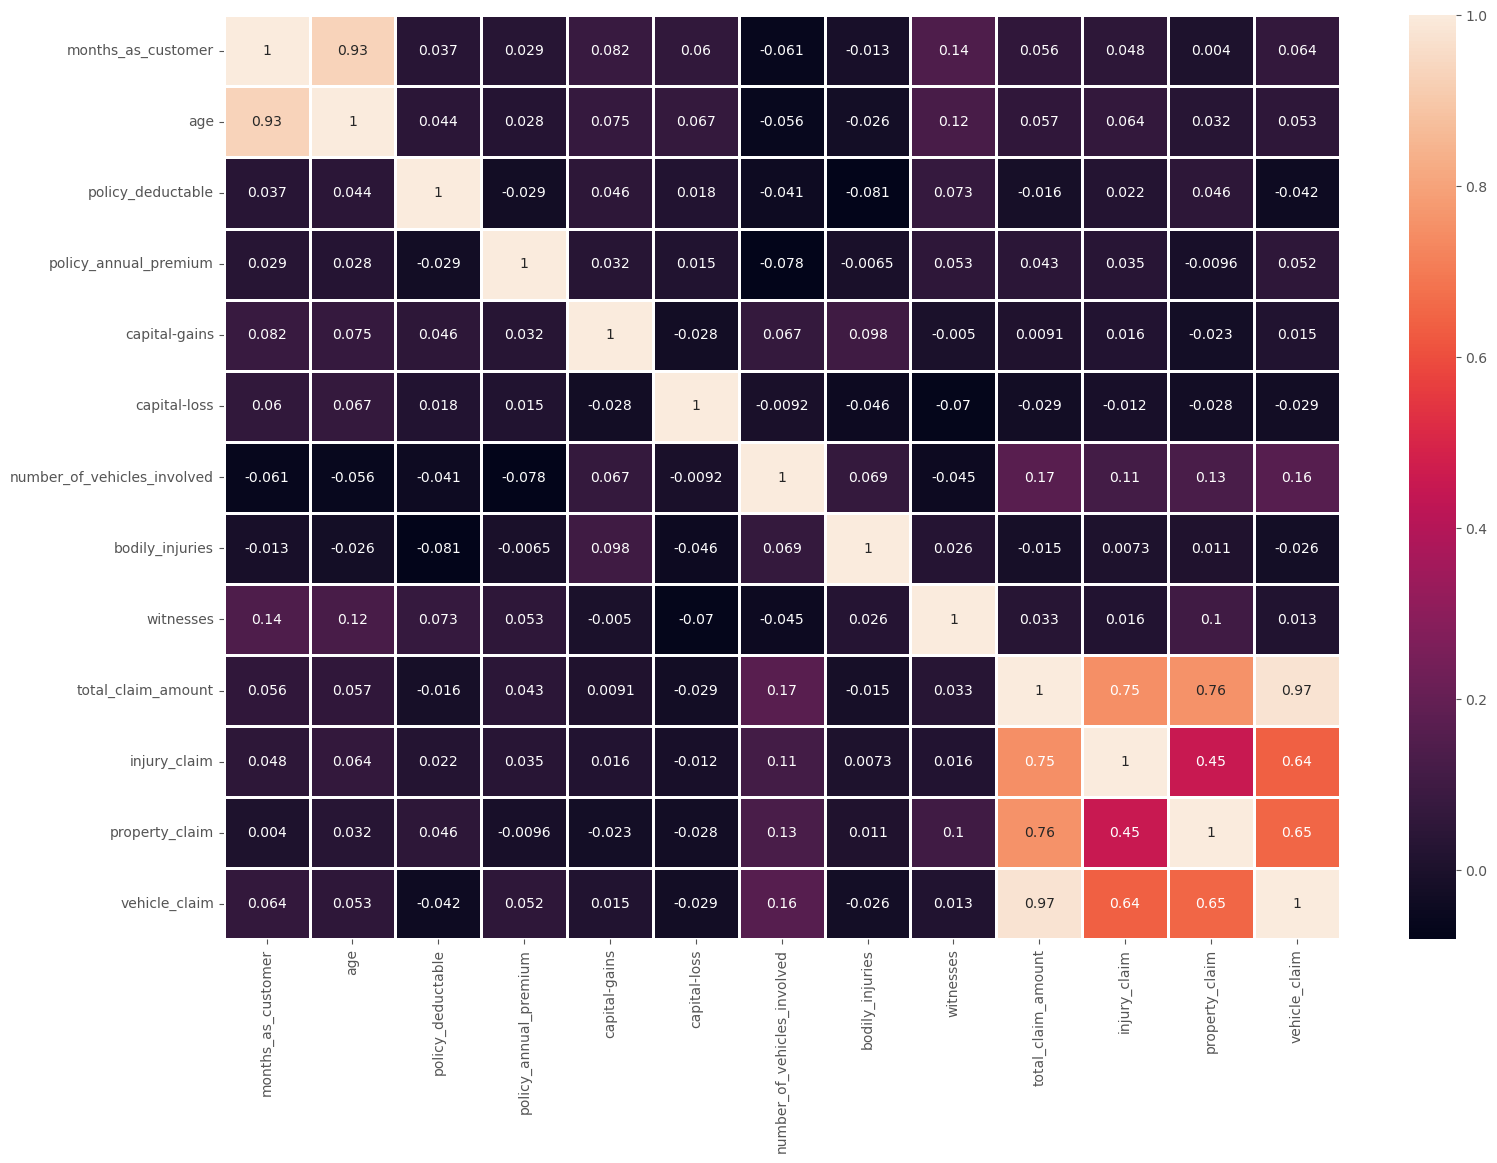

In [18]:
plt.figure(figsize = (18, 12))

corr = df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

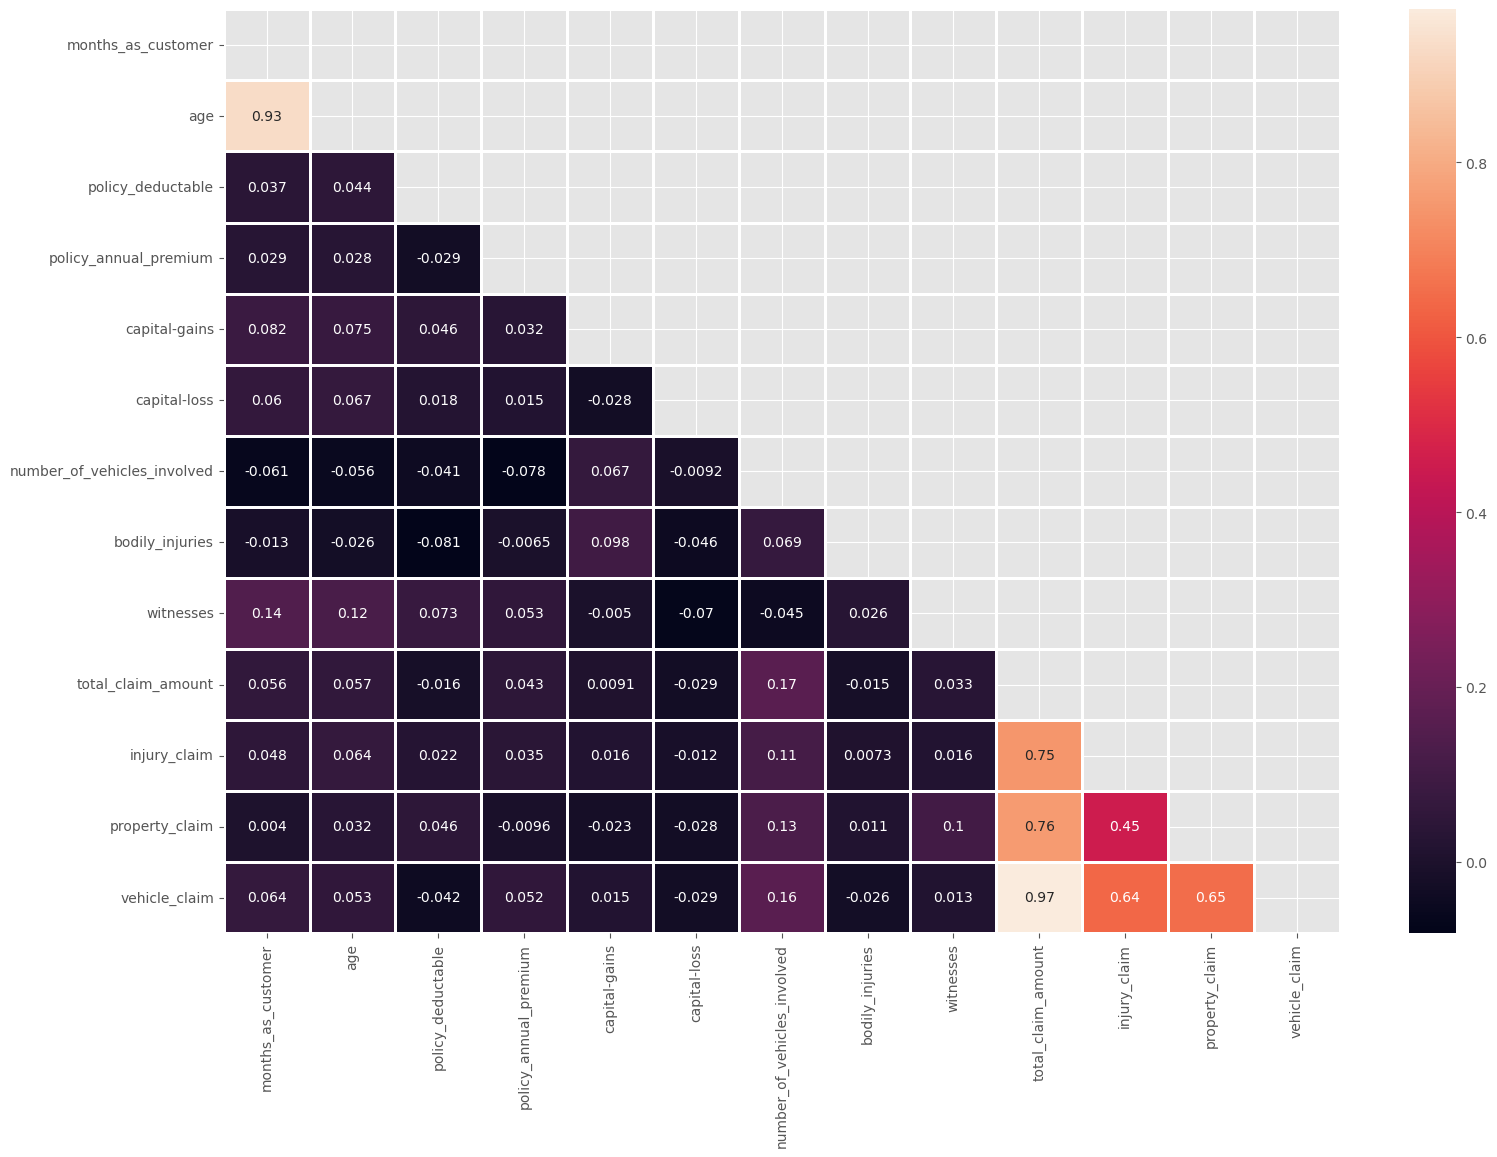

In [19]:
# checking for multicollinearity

plt.figure(figsize = (18, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [20]:
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

In [21]:
df['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
df['fraud_reported'].replace(to_replace='N',  value=0, inplace=True)


In [22]:
df._get_numeric_data().columns

Index(['months_as_customer', 'policy_deductable', 'policy_annual_premium',
       'capital-gains', 'capital-loss', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim', 'fraud_reported'],
      dtype='object')

In [23]:
df.select_dtypes(include=['object']).columns  # checking categorcial columns

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make',
       'auto_model'],
      dtype='object')

In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df is your original DataFrame
# Create dummy variables for categorical columns
dummies = pd.get_dummies(df, columns=[
    'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
    'insured_occupation', 'insured_hobbies', 'insured_relationship',
    'incident_type', 'incident_severity', 'authorities_contacted',
    'incident_state', 'incident_city', 'auto_make', 'auto_model',
    'collision_type', 'property_damage', 'police_report_available'
])

# Drop original categorical columns from the original DataFrame
df = df.drop(columns=[
    'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
    'insured_occupation', 'insured_hobbies', 'insured_relationship',
    'incident_type', 'incident_severity', 'authorities_contacted',
    'incident_state', 'incident_city', 'auto_make', 'auto_model',
    'collision_type', 'property_damage', 'police_report_available'
])

# Encode the target variable 'fraud_reported'
label_encoder = LabelEncoder()
df['fraud_reported'] = label_encoder.fit_transform(df['fraud_reported'])

# Separate the target variable 'fraud_reported' from the features
y = df['fraud_reported']
X = df.drop(columns=['fraud_reported'])

# Now 'y' should only contain one column
print(y)



0      1
1      1
3      1
5      1
14     1
      ..
389    0
815    0
274    0
681    0
998    0
Name: fraud_reported, Length: 494, dtype: int64


# Applying different models

In [25]:
# X = df.drop('fraud_reported', axis = 1)
# Y = df['fraud_reported']
# print(Y.shape)
# print(Y)
# r=df['fraud_reported']
# print(r)
# print(r.shape)
# X = X.drop(columns = ['fraud_reported'])
# X.columns

X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

In [26]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=54)
# print(y_train.shape)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [27]:
X_train.head()

,months_as_customer,policy_deductable,policy_annual_premium,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
368,-1.631997,-0.246175,-0.262746,-0.947158,-1.167750,-0.826074,-1.210620,0.444885,-0.725029,0.213162,-0.286741
921,-0.240501,-1.067866,0.513615,-0.947158,0.950678,1.126465,-1.210620,1.368303,-0.565105,0.536492,0.071735
145,1.581697,-1.067866,-1.036883,-0.947158,-1.070030,-0.826074,1.225414,-0.478532,-0.044818,1.588391,2.150899
538,2.244314,-0.246175,0.160565,0.780065,0.950678,-0.826074,0.007397,1.368303,-1.473475,-1.603951,-2.217137
8,-1.491190,-1.067866,0.759408,-0.947158,0.950678,-0.826074,0.007397,-0.478532,-1.083259,-1.108179,-1.089729


# SVC

In [28]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Support Vector Classifier is : 0.7837837837837838
Test accuracy of Support Vector Classifier is : 0.6451612903225806
[[39 23]
 [21 41]]
              precision    recall  f1-score   support

           0       0.65      0.63      0.64        62
           1       0.64      0.66      0.65        62

    accuracy                           0.65       124
   macro avg       0.65      0.65      0.65       124
weighted avg       0.65      0.65      0.65       124



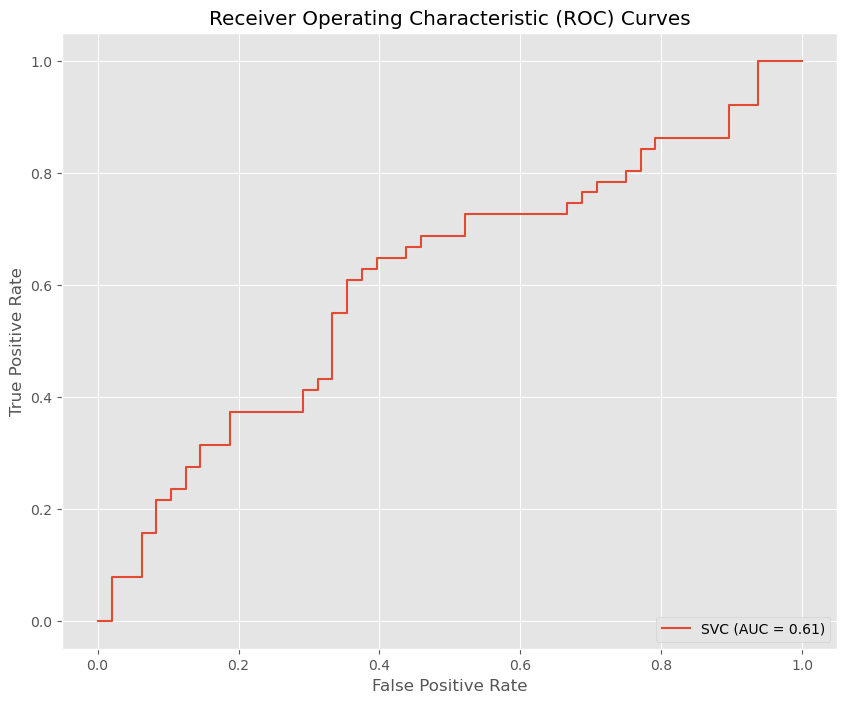

In [30]:
# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
#     'KNN': KNeighborsClassifier(),
    'SVC': SVC(probability=True),
#     'Random Forest': RandomForestClassifier(),
#     'Decision Tree': DecisionTreeClassifier()
}

# Plot ROC curves
plt.figure(figsize=(10, 8))

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    
    # Get predicted probabilities
    y_prob = clf.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')



# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')

plt.show()


an AUC of 0.61 suggests that the SVC model is somewhat effective in distinguishing between positive and negative instances, but there is room for improvement.

# KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [32]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of KNN is : 0.5772151898734177
Test accuracy of KNN is : 0.46464646464646464
[[25 23]
 [30 21]]
              precision    recall  f1-score   support

           0       0.45      0.52      0.49        48
           1       0.48      0.41      0.44        51

    accuracy                           0.46        99
   macro avg       0.47      0.47      0.46        99
weighted avg       0.47      0.46      0.46        99



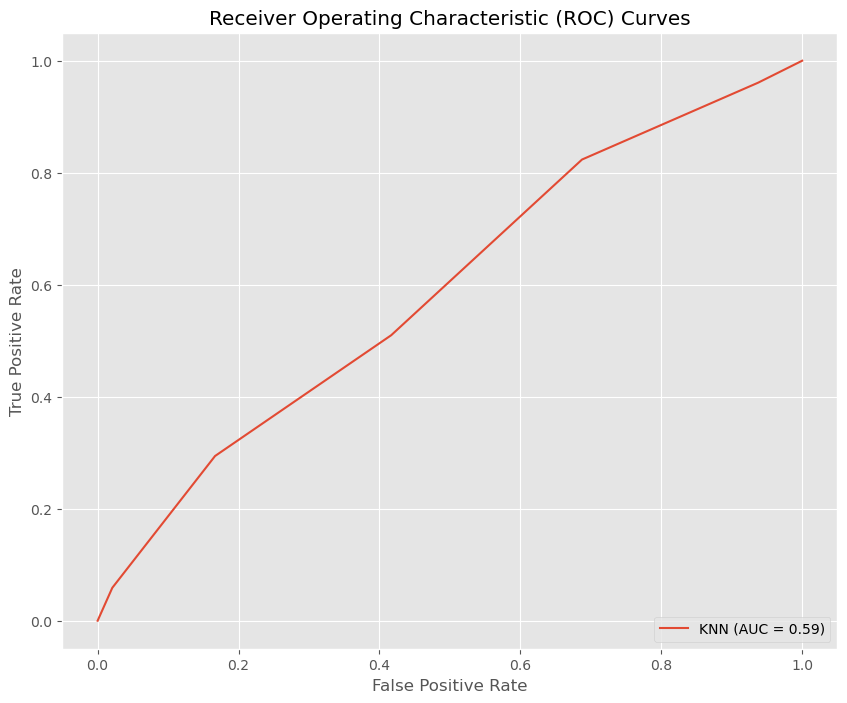

In [33]:
# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
   
}

# Plot ROC curves
plt.figure(figsize=(10, 8))

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    
    # Get predicted probabilities
    y_prob = clf.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')



# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')

plt.show()


since auc is slightly greater than 0.5(area under roc curve),the needs significant improvment and is not able to distinguish negative and positive class with acceptable accuracy

# DECISION TREE

In [34]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

In [35]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.5757575757575758
[[29 19]
 [23 28]]
              precision    recall  f1-score   support

           0       0.56      0.60      0.58        48
           1       0.60      0.55      0.57        51

    accuracy                           0.58        99
   macro avg       0.58      0.58      0.58        99
weighted avg       0.58      0.58      0.58        99



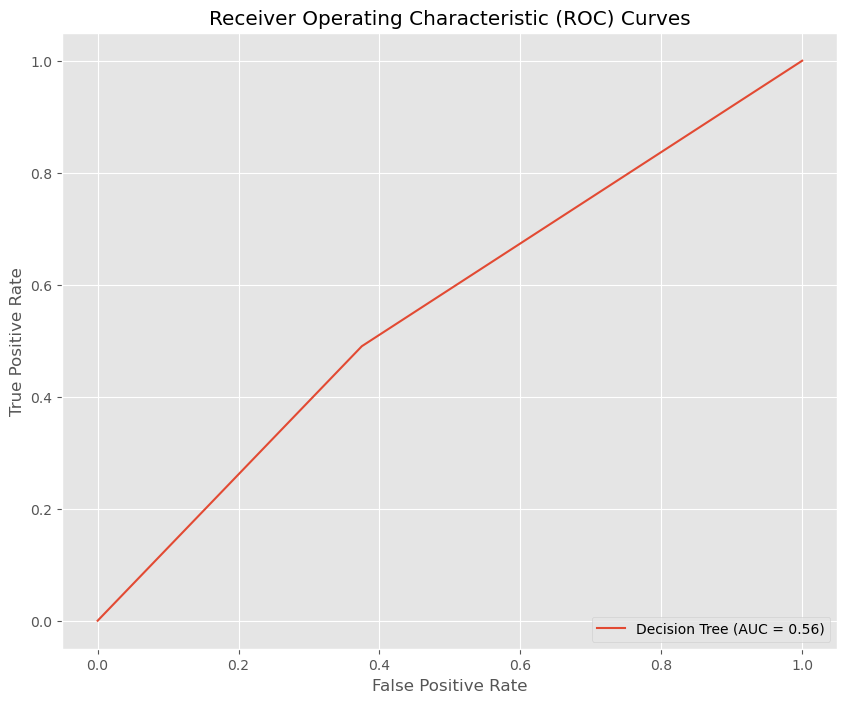

In [36]:
# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    
    'Decision Tree': DecisionTreeClassifier()
}

# Plot ROC curves
plt.figure(figsize=(10, 8))

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    
    # Get predicted probabilities
    y_prob = clf.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')



# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')

plt.show()


# RANDOM FOREST

In [37]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)

In [38]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest is : 0.9974683544303797
Test accuracy of Random Forest is : 0.5959595959595959
[[30 18]
 [22 29]]
              precision    recall  f1-score   support

           0       0.58      0.62      0.60        48
           1       0.62      0.57      0.59        51

    accuracy                           0.60        99
   macro avg       0.60      0.60      0.60        99
weighted avg       0.60      0.60      0.60        99



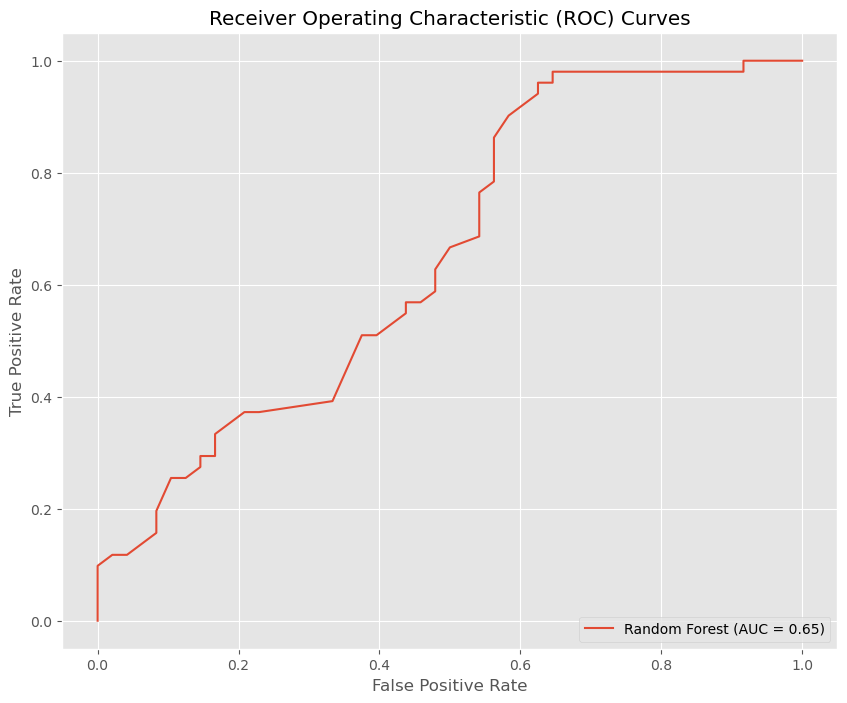

In [39]:
# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    
    'Random Forest': RandomForestClassifier(),
   
}

# Plot ROC curves
plt.figure(figsize=(10, 8))

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    
    # Get predicted probabilities
    y_prob = clf.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')



# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')

plt.show()


 auc for random forest is highest among all thus it is the most suitale model for prediction

In [40]:
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report

# # Assuming X and y are your feature matrix and target variable
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize classifiers
# classifiers = {
#     'SVC': SVC(),
#     'KNN': KNeighborsClassifier(),
#     'Decision Tree': DecisionTreeClassifier(),
#     'Random Forest': RandomForestClassifier()
# }

# # Loop through each classifier
# for name, clf in classifiers.items():
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)

#     # Print classification report
#     print(f"Classification Report for {name}:")
#     print(classification_report(y_test, y_pred))
#     print("-" * 50)
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Loop through each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calculate specificity, sensitivity, and accuracy
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    accuracy = accuracy_score(y_test, y_pred)

    # Print results
    print(f"Results for {name}:")
    print(f"Specificity: {specificity:.4f}")
    print(f"Sensitivity (Recall): {sensitivity:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print("-" * 50)


Results for SVC:
Specificity: 0.6667
Sensitivity (Recall): 0.4902
Accuracy: 0.5758
--------------------------------------------------
Results for KNN:
Specificity: 0.5833
Sensitivity (Recall): 0.5098
Accuracy: 0.5455
--------------------------------------------------
Results for Decision Tree:
Specificity: 0.6250
Sensitivity (Recall): 0.4706
Accuracy: 0.5455
--------------------------------------------------
Results for Random Forest:
Specificity: 0.6458
Sensitivity (Recall): 0.5686
Accuracy: 0.6061
--------------------------------------------------


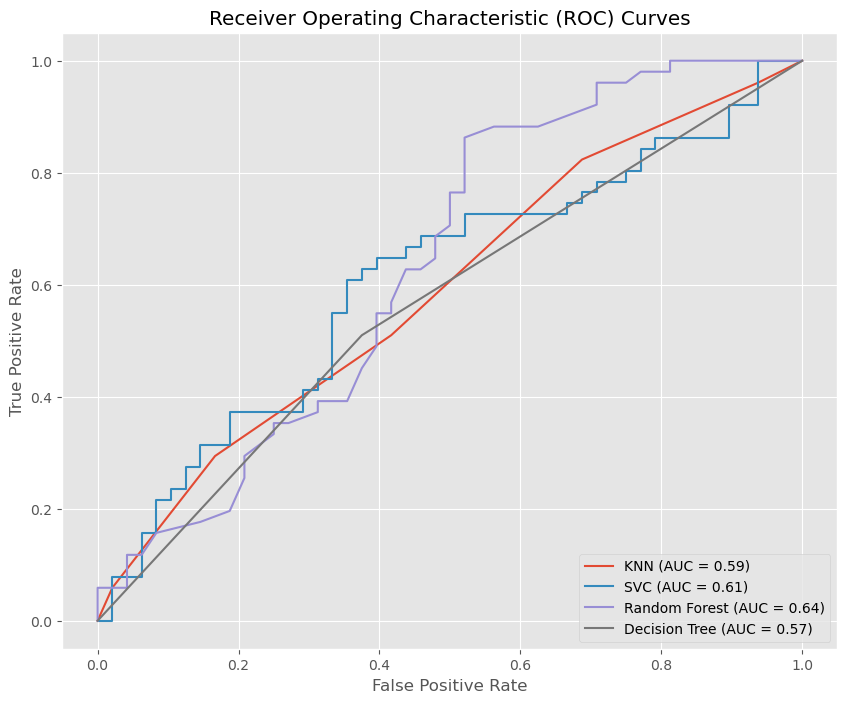

In [41]:

# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Plot ROC curves
plt.figure(figsize=(10, 8))

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    
    # Get predicted probabilities
    y_prob = clf.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')



# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')

plt.show()
